In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from ponapt.vocab import load_vocab
from ponapt.lm import LM
from sklearn.manifold import TSNE

In [2]:
vocab = load_vocab('../ponapt/work/vocab.txt')
model = LM(len(vocab), 1024, 16, 4096, 0, 0, 0, 0, 6, padding_idx = 0, max_len = 256)
model.load_state_dict(torch.load('../ponapt/work/checkpoints/lm.pt', map_location = 'cpu'))
model.eval()
embed = model.embedding.token_embedding.weight.data.cpu().numpy()

In [3]:
method = TSNE(n_components = 2, perplexity = 20)
comp = method.fit(embed).embedding_

/home/nymwa/nymwa/tokipona/envs/loha9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nymwa/nymwa/tokipona/envs/loha9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


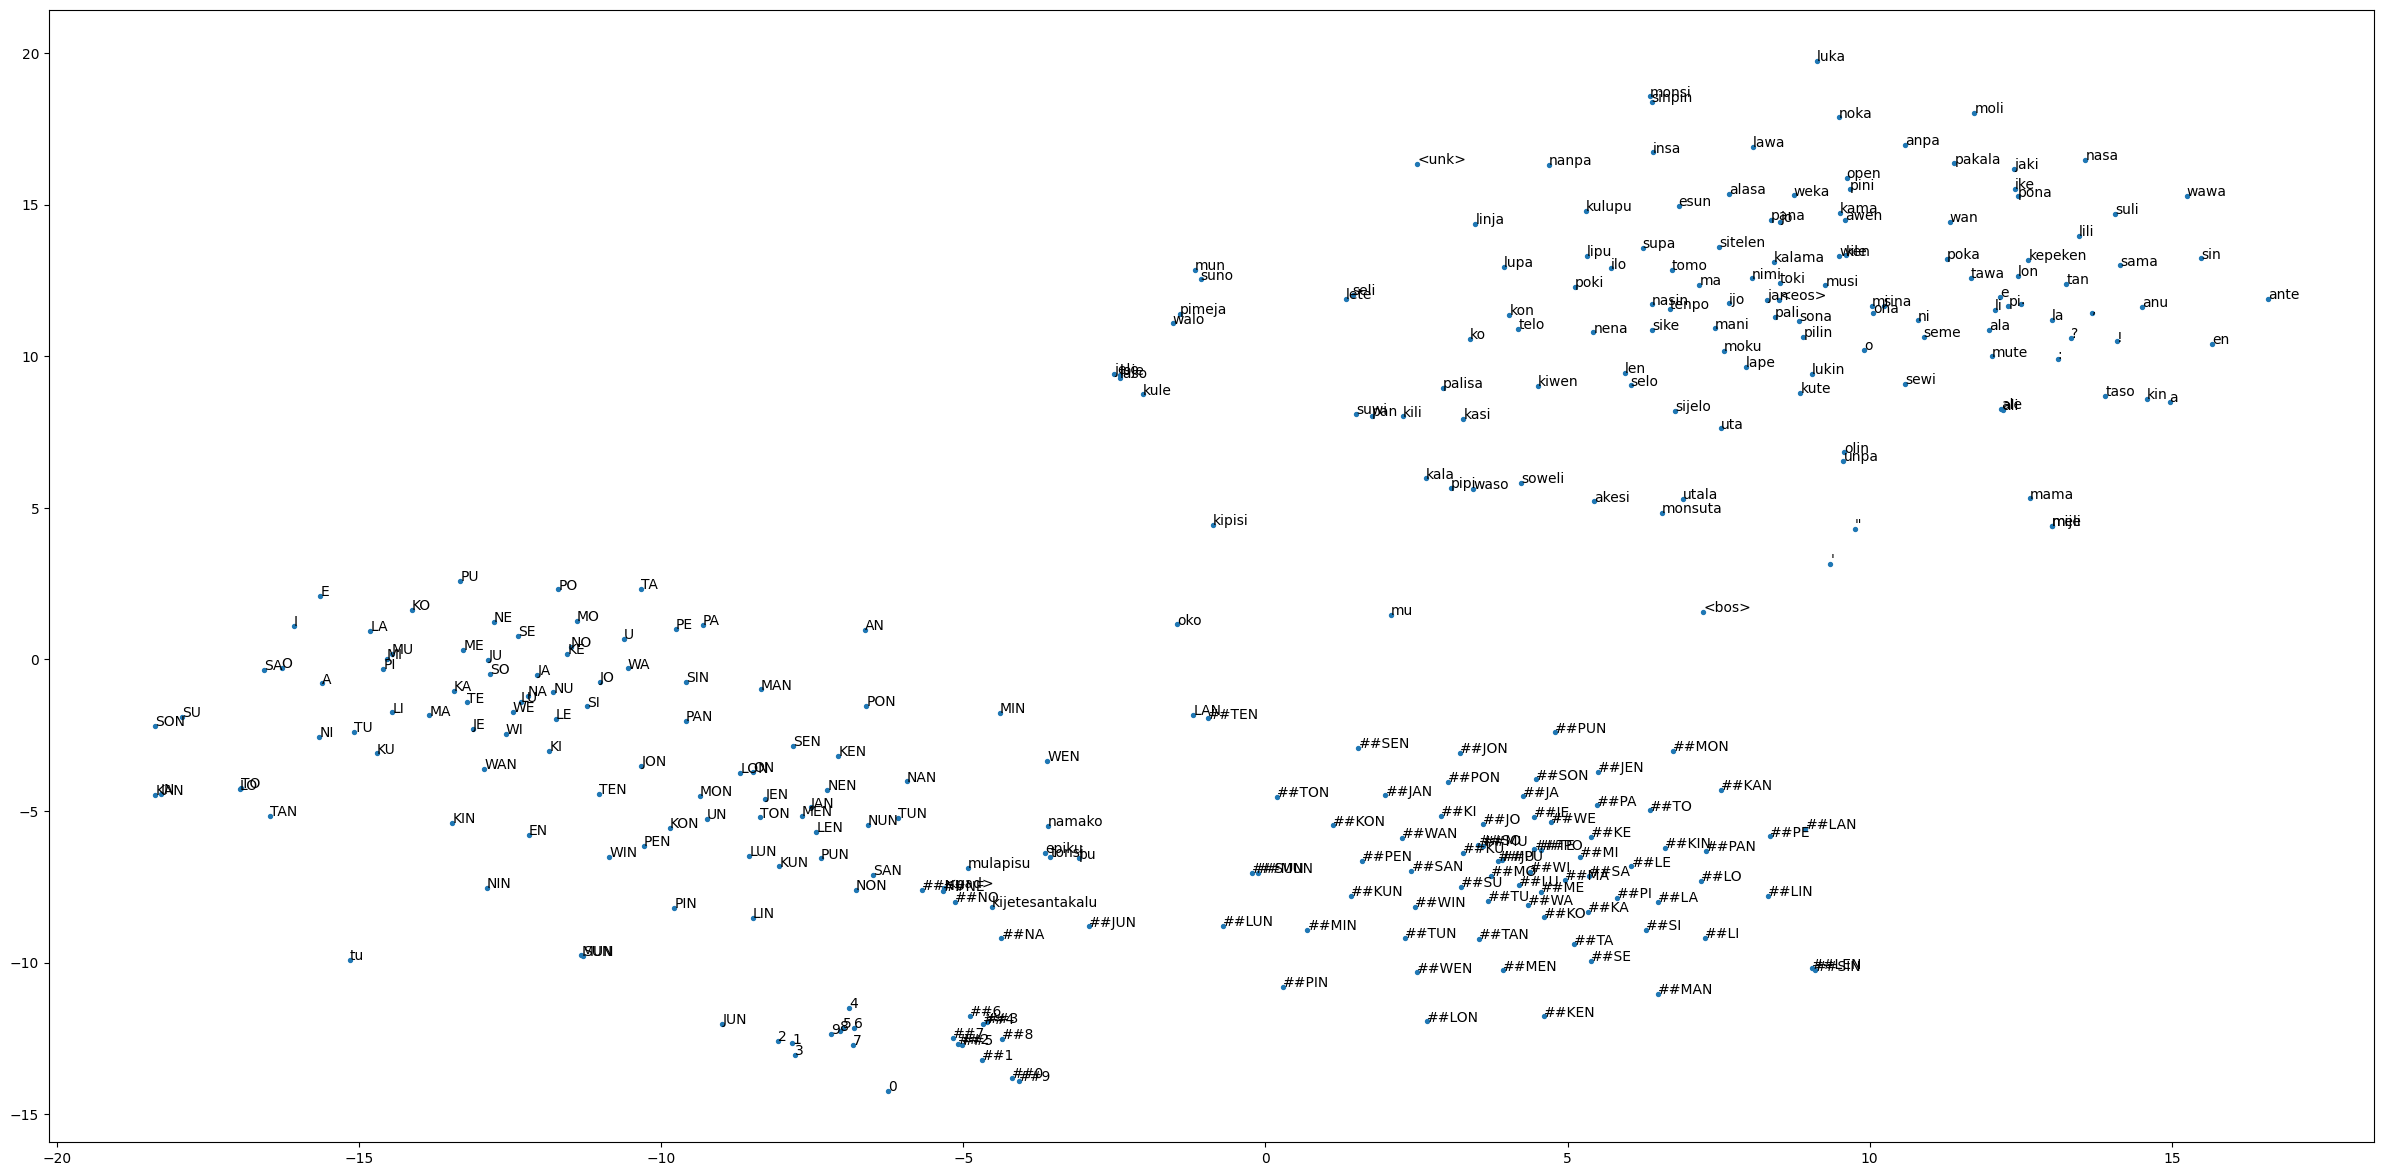

In [4]:
plt.figure(figsize = (30, 15), dpi = 100)

plt.scatter(
    comp[:, 0],
    comp[:, 1],
    s = 8)

for (x, y), word in zip(comp, vocab.tokens):
    plt.annotate(word, (x, y))

plt.show()